# Natural Language Processing with Disaster Tweets

### Welcome to one of our "Getting Started" competitions 👋

This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called [Kaggle Notebooks](https://www.kaggle.com/docs/kernels#the-kernels-environment).

### Competition Description

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:

![img](https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png)



The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a [quick tutorial](https://www.kaggle.com/philculliton/nlp-getting-started-tutorial) to get you up and running.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

### Acknowledgments

This dataset was created by the company figure-eight and originally shared on their [‘Data For Everyone’ website here](https://www.figure-eight.com/data-for-everyone/).

Tweet source: https://twitter.com/AnyOtherAnnaK/status/629195955506708480

## What files do I need?

You'll need **train.csv**, **test.csv** and **sample_submission.csv**.

## What should I expect the data format to be?

Each sample in the train and test set has the following information:

- The `text` of a tweet
- A `keyword` from that tweet (although this may be blank!)
- The `location` the tweet was sent from (may also be blank)

## What am I predicting?

You are predicting whether a given tweet is about a real disaster or not. If so, predict a `1`. If not, predict a `0`.

## Files

- **train.csv** - the training set
- **test.csv** - the test set
- **sample_submission.csv** - a sample submission file in the correct format

## Columns

- `id` - a unique identifier for each tweet
- `text` - the text of the tweet
- `location` - the location the tweet was sent from (may be blank)
- `keyword` - a particular keyword from the tweet (may be blank)
- `target` - in **train.csv** only, this denotes whether a tweet is about a real disaster (`1`) or not (`0`)

Link: https://www.kaggle.com/c/nlp-getting-started  
Help: https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})

<IPython.core.display.Javascript object>

## Загрузка данных

In [4]:
train = pd.read_csv("datasets/train.csv", index_col="id")
train

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


<IPython.core.display.Javascript object>

In [5]:
test = pd.read_csv("datasets/test.csv", index_col="id")
test

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...


<IPython.core.display.Javascript object>

In [6]:
sample_submission = pd.read_csv("datasets/sample_submission.csv", index_col="id")
sample_submission

,target
id,
0,0
2,0
3,0
9,0
11,0
...,...
10861,0
10865,0
10868,0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='count'>

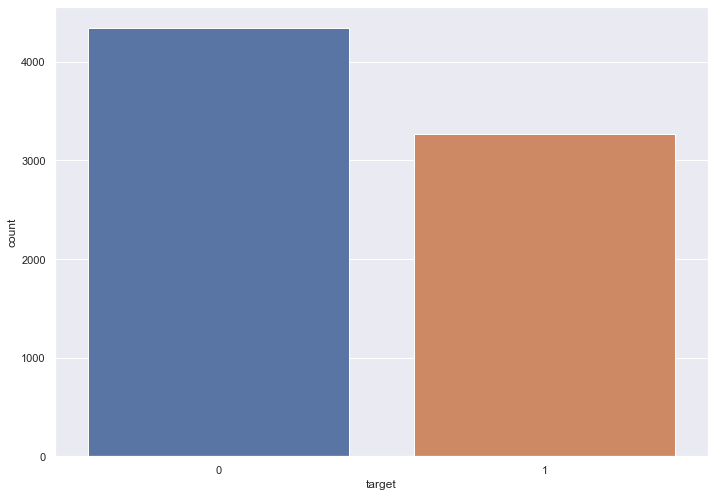

<IPython.core.display.Javascript object>

In [7]:
sns.countplot(x=train["target"])